In [33]:
import tensorflow as tf
import numpy as np
import random


def is_prime_tf(n):
    if n <= 1:
        return False
    if n == 2:
        return True
    if n % 2 == 0:
        return False

    limit = int(n**0.5) + 1
    if limit < 3:
        return True

    divisors = tf.range(3, limit, 2, dtype=tf.int32)

    remainders = tf.math.floormod(n, divisors)
    is_prime = tf.reduce_all(tf.not_equal(remainders, 0))

    return is_prime

def goldbach_conjecture_tf(number):
    for i in range(2, number):
        if is_prime_tf(i) and is_prime_tf(number - i):
            print(f"{number} = {i} + {number - i}")
            return
    print(f"No primes found that sum up to {number}")

def random_even(min_value, max_value):
    if min_value > max_value:
        raise ValueError("min_value should be less than or equal to max_value")
    if min_value % 2 != 0:
        min_value += 1
    if max_value % 2 != 0:
        max_value -= 1
    if min_value > max_value:
        raise ValueError("No even numbers in the given range")
    return random.randrange(min_value, max_value + 1, 2)

# Test
random_number = random_even(5, 2000)
goldbach_conjecture_tf(random_number)


236 = 3 + 233


# Can TensorFlow or Any ML Model Learn It?

In [34]:

def generate_goldbach_dataset(max_num):
    X = []
    y = []

    for n in range(4, max_num + 1, 2):
        X.append([n])
        can_be_expressed = 0
        for i in range(2, n):
            if is_prime_tf(i) and is_prime_tf(n - i):
                can_be_expressed = 1
                break
        y.append(can_be_expressed)

    return np.array(X), np.array(y)


X, y = generate_goldbach_dataset(1000)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X, y, epochs=50, batch_size=10)

loss, accuracy = model.evaluate(X, y)
print(f"Accuracy: {accuracy * 100:.2f}%")


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 141 (564.00 B)

 Trainable params: 141 (564.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 5.4169e-04
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 6.0475e-04
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 1.6639e-04
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 5.7776e-05
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 4.1317e-05
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.4301e-05
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.5349e-05
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.6400e-05
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 7.8577e-06
Epoch 10/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.2318e-05
Epoch 11/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.6554e-06
Epoch 12/50
50/50 ━━━━━━━━━━━━

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


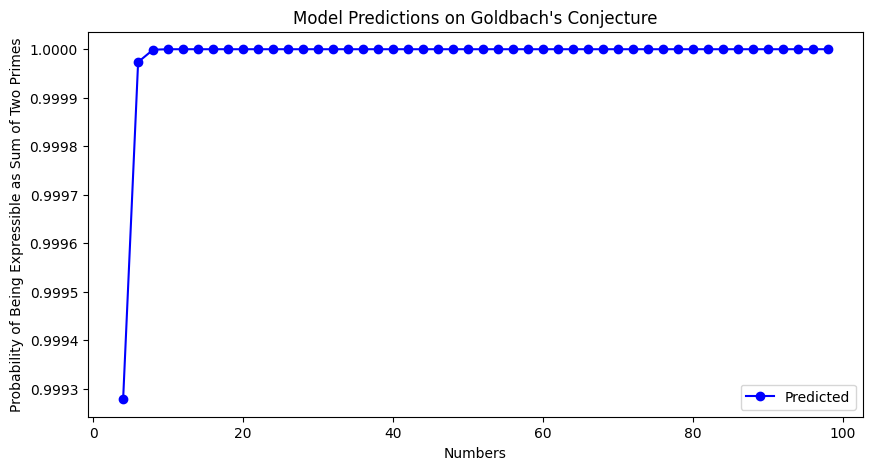

In [35]:
'''
for layer in model.layers:
    weights, biases = layer.get_weights()
    print(f"Weights for layer {layer.name}: {weights}")
    print(f"Biases for layer {layer.name}: {biases}")
'''

import numpy as np
import matplotlib.pyplot as plt

test_numbers = np.arange(4, 100, 2)

test_numbers = test_numbers.reshape(-1, 1)

predictions = model.predict(test_numbers)

# Plot the predictions
plt.figure(figsize=(10, 5))
plt.plot(test_numbers, predictions, 'bo-', label="Predicted")
plt.xlabel("Numbers")
plt.ylabel("Probability of Being Expressible as Sum of Two Primes")
plt.title("Model Predictions on Goldbach's Conjecture")
plt.legend()
plt.show()


In [36]:

new_number = np.array([[random_number]])
prediction = model.predict(new_number)
print(f"Can {new_number[0][0]} be expressed as a sum of two primes? {'Yes' if prediction > 0.5 else 'No'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Can 236 be expressed as a sum of two primes? Yes
